## Modeling of Acoustic Scattering by a Cylindrical Obstacle in an Infinite Domain

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma
from numpy import pi 
from scat_cylinder import u_exact

- $ r_i$: Inner radius [m].
- $ r_e$: Outer radius [m].
- $ r_a$: Radius of the outermost layer [m].
- $ k$: Wave number [a.u.].

In [2]:
r_i = 1.0 # Inner radius
r_e = 10 # Outer radius
r_a = 11 # Radius of the outermost layer
k = 1.0  # Wave number

### Analytical Solution

In [3]:
# Define the grid in polar (cylindrical) coordinates
r = np.linspace(r_i, r_e, 501)  # Radial distance from 0.1 to 10 (avoid 0 to prevent singularity)
theta = np.linspace(0, 2*pi, 501)  # Angle from 0 to 2*pi
R, Theta = np.meshgrid(r, theta)  # Create meshgrid for r and theta

# Calculate the displacement
u_tot, u_scn = u_exact(R, Theta, r_i, k)  # Calculate the displacement

# Mask out regions where r < 1 (inside the circle with radius 1)
u_tot_amp = -ma.masked_where(R < 1.0, np.real(u_tot))
u_scn_amp = -ma.masked_where(R < 1.0, np.real(u_scn))

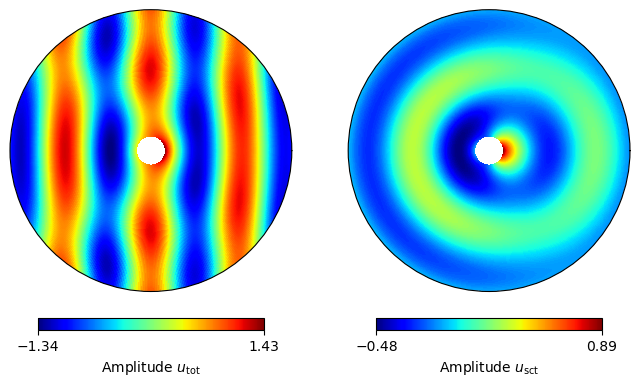

In [4]:
# Plot the amplitude in polar coordinates
plt.figure(figsize=(8, 5))

# Plot amplitude (real part of displacement) in polar coordinates
ax1 = plt.subplot(1, 2, 1, projection='polar')
c = ax1.pcolormesh(Theta, R, np.round(np.real(u_tot_amp),2), cmap="jet", shading='auto')   
cb = plt.colorbar(c, ax=ax1, shrink=0.8, orientation="horizontal", pad=0.07)
cb.set_label("Amplitude $u_{\\text{tot}}$")
#cb.set_ticks([np.round(np.min(np.real(u_tot_amp)), 2), 0, np.round(np.max(np.real(u_tot_amp)), 2)])
ax1.set_xticklabels([])  # Remove radial labels
ax1.set_yticklabels([])  # Remove radial labels
cb.set_ticks([np.round(np.min(np.real(u_tot_amp)),2), np.round(np.max(np.real(u_tot_amp)),2)]) 
ax1.grid(False)  # Hide grid lines

# Plot the phase (angle of the displacement) in polar coordinates
ax2 = plt.subplot(1, 2, 2, projection='polar')
c = ax2.pcolormesh(Theta, R,  np.round(np.real(u_scn_amp),2), cmap="jet", shading='auto')  
cb = plt.colorbar(c, ax=ax2, shrink=0.8, orientation="horizontal", pad=0.07)
cb.set_label("Amplitude $u_{\\text{sct}}$")
# Remove radial grid lines and radial ticks
ax2.set_xticklabels([])  # Remove radial labels
ax2.set_yticklabels([])  # Remove radial labels
ax2.grid(False)  # Hide grid lines
cb.set_ticks([np.round(np.min(np.real(u_scn_amp)),2), np.round(np.max(np.real(u_scn_amp)),2)]) 

plt.show()

### Finite Element Method (FEM)

### Physics informed neural networks (PINNs)